In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="viridis")

df = pd.read_csv("../data/raw/housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.rename(columns={
    'longitude': 'longitud',
    'latitude': 'latitud',
    'housing_median_age': 'edad_media_vivienda',
    'total_rooms': 'total_habitaciones',
    'total_bedrooms': 'total_dormitorios',
    'population': 'poblacion',
    'households': 'hogares',
    'median_income': 'ingreso_medio',
    'median_house_value': 'valor_medio_vivienda',
    'ocean_proximity': 'proximidad_oceano'
}, inplace=True)

df.head()

,longitud,latitud,edad_media_vivienda,total_habitaciones,total_dormitorios,poblacion,hogares,ingreso_medio,valor_medio_vivienda,proximidad_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
# Mapeo de nombres originales a nombres en español
mapa_proximidad = {
    "NEAR BAY": "Cerca de la bahía",
    "<1H OCEAN": "A menos de 1 hora del océano",
    "INLAND": "Tierra adentro",
    "NEAR OCEAN": "Cerca del océano",
    "ISLAND": "Isla"
}

# Aplicar el cambio
df["proximidad_oceano"] = df["proximidad_oceano"].replace(mapa_proximidad)

# Verificar resultado
df["proximidad_oceano"].value_counts()


proximidad_oceano
A menos de 1 hora del océano    9136
Tierra adentro                  6551
Cerca del océano                2658
Cerca de la bahía               2290
Isla                               5
Name: count, dtype: int64

In [3]:
# Mostrará: Cantidad de filas y columnas, Tipos de datos (float, int, object...), Valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitud              20640 non-null  float64
 1   latitud               20640 non-null  float64
 2   edad_media_vivienda   20640 non-null  float64
 3   total_habitaciones    20640 non-null  float64
 4   total_dormitorios     20433 non-null  float64
 5   poblacion             20640 non-null  float64
 6   hogares               20640 non-null  float64
 7   ingreso_medio         20640 non-null  float64
 8   valor_medio_vivienda  20640 non-null  float64
 9   proximidad_oceano     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Esto revela medidas como media, desviación estándar, mínimo, máximo, percentiles, etc.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitud,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitud,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
edad_media_vivienda,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_habitaciones,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_dormitorios,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
poblacion,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
hogares,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
ingreso_medio,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
valor_medio_vivienda,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


| Variable                 | Descripción                                                             | Tipo de dato | Observaciones                                  |
| ------------------------ | ----------------------------------------------------------------------- | ------------ | ---------------------------------------------- |
| **longitud**             | Coordenada geográfica (negativa por estar en el hemisferio occidental). | float        | Rango entre -124.35 y -114.31.                 |
| **latitud**              | Coordenada geográfica (posición norte-sur).                             | float        | Rango entre 32.54 y 41.95.                     |
| **edad_media_vivienda**  | Edad promedio de las viviendas.                                         | float        | Promedio: 28.6 años, máx.: 52.                 |
| **total_habitaciones**   | Número total de habitaciones por zona.                                  | float        | Promedio: 2.635, máx.: 39.320 (outliers).      |
| **total_dormitorios**    | Total de dormitorios por zona.                                          | float        | Algunos valores faltantes.                     |
| **poblacion**            | Número total de habitantes en la zona.                                  | float        | Promedio: 1.425, máx.: 35.682 (outliers).      |
| **hogares**              | Total de hogares por zona.                                              | float        | Promedio: 499 hogares.                         |
| **ingreso_medio**        | Ingreso medio expresado en decenas de miles de dólares.                 | float        | Promedio: 3.87 → ≈ USD 38.700 anuales.         |
| **valor_medio_vivienda** | Valor promedio de las viviendas (en dólares).                           | float        | Promedio: USD 206.855. Límite máximo: 500.001. |
| **proximidad_oceano**    | Categoría geográfica según cercanía al mar.                             | object       | Variable categórica.                           |


In [6]:
# Revisa duplicados
df.duplicated().sum()

np.int64(0)

In [7]:
# Dimensiones del dataset
df.shape

(20640, 10)

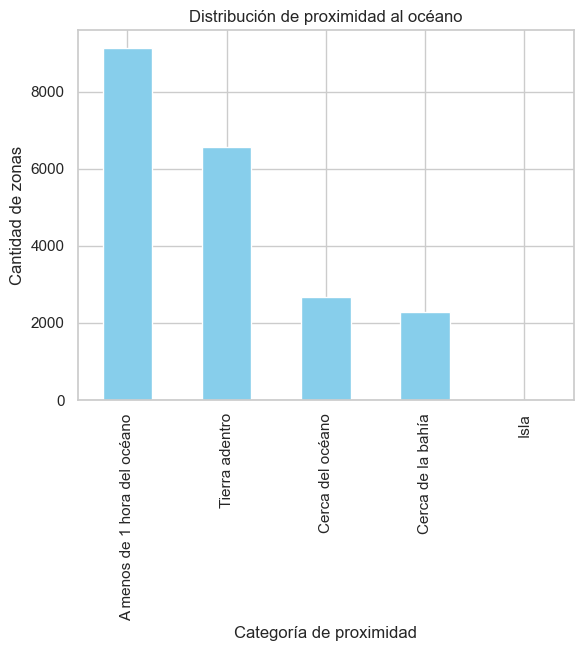

In [14]:
import matplotlib.pyplot as plt

df["proximidad_oceano"].value_counts().plot(
    kind="bar", color="skyblue", title="Distribución de proximidad al océano"
)
plt.xlabel("Categoría de proximidad")
plt.ylabel("Cantidad de zonas")
plt.show()


In [ ]:
df.hist(figsize=(12,8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribucion de las variables del dataset", fontsize=16)
plt.show()


In [ ]:
sns.pairplot(df.sample(500), diag_kind="kde")
plt.suptitle("Relaciones entre variables principales", y=1.02)
plt.show()


In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación entre Variables Numéricas")
plt.show()
